In [1]:
import os
import sys
import glob
import numpy as np
from obspy import read_inventory, UTCDateTime

localLibPath = os.path.join('..', 'lib')
sys.path.append(localLibPath)
from seisan_classes import set_globals, read_seisandb_apply_custom_function_to_each_event
#import libSeisan2Pandas as seisan
import libMVO 
from SAM import DSAM
from ASL import ASL, initial_source, make_grid
from InventoryTools import show_response #, has_response

#SDS_DIR = '/data/SDS' #'/Volumes/NTFS_2TB_EXT/SDS'
HOME = os.path.expanduser('~')
DATA_DIR = os.path.join(HOME, 'Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/data')
#SAM_DIR = os.path.join(DATA_DIR,'continuous','SAM')
SAM_DIR = '/data/SAM' #os.path.join(DATA_DIR,'continuous','SAM')
DEM_DIR = os.path.join(DATA_DIR,'DEMs')
#RESPONSE_DIR = os.path.join(DATA_DIR,'responses')
#SEISAN_DATA = os.path.join( '/data', 'SEISAN_DB')
#DB = 'MVOE_'

SEISAN_DATA, DB, station_locationsDF, inv = set_globals()
print(inv)
show_response(inv)

startdate=UTCDateTime(2001,1,1)
enddate=UTCDateTime(2001,1,1,2,0,0)


Inventory created at 2024-01-11T03:20:26.394930Z
	Created by: ObsPy 1.4.0
		    https://www.obspy.org
	Sending institution: ObsPy's obspy.io.xseed version 1.2.2
	Contains:
		Networks (54):
			MV (54x)
		Stations (75):
			MV.MBBE () (3x)
			MV.MBBY () (6x)
			MV.MBFL () (3x)
			MV.MBFR () (3x)
			MV.MBGA () (3x)
			MV.MBGB () (6x)
			MV.MBGE () (3x)
			MV.MBGH () (9x)
			MV.MBHA () (3x)
			MV.MBLG () (6x)
			MV.MBLY () (6x)
			MV.MBMH () (3x)
			MV.MBRV () (3x)
			MV.MBRY () (9x)
			MV.MBSS () (3x)
			MV.MBWH () (6x)
		Channels (75):
			MV.MBBE..BHZ, MV.MBBE..BHN, MV.MBBE..BHE, MV.MBBY..BHZ, 
			MV.MBBY..BHN, MV.MBBY..BHE, MV.MBBY..HHZ, MV.MBBY..HHN, 
			MV.MBBY..HHE, MV.MBFL..EHZ, MV.MBFL..EHN, MV.MBFL..EHE, 
			MV.MBFR..HHZ, MV.MBFR..HHN, MV.MBFR..HHE, MV.MBGA..BHZ, 
			MV.MBGA..BHN, MV.MBGA..BHE, MV.MBGB..BHZ, MV.MBGB..BHN, 
			MV.MBGB..BHE, MV.MBGB..HHZ, MV.MBGB..HHN, MV.MBGB..HHE, 
			MV.MBGE..BHZ, MV.MBGE..BHN, MV.MBGE..BHE, MV.MBGH..BHZ, 
			MV.MBGH..BHN, MV.MBGH..BHE, MV.MBGH..H

['/data/SEISAN_DB/REA/MVOE_/2001/01/01-0007-02L.S200101', '/data/SEISAN_DB/REA/MVOE_/2001/01/01-0010-00L.S200101', '/data/SEISAN_DB/REA/MVOE_/2001/01/01-0026-17L.S200101', '/data/SEISAN_DB/REA/MVOE_/2001/01/01-0028-27L.S200101', '/data/SEISAN_DB/REA/MVOE_/2001/01/01-0037-50L.S200101', '/data/SEISAN_DB/REA/MVOE_/2001/01/01-0040-14L.S200101', '/data/SEISAN_DB/REA/MVOE_/2001/01/01-0104-44L.S200101', '/data/SEISAN_DB/REA/MVOE_/2001/01/01-0115-13L.S200101', '/data/SEISAN_DB/REA/MVOE_/2001/01/01-0122-30L.S200101', '/data/SEISAN_DB/REA/MVOE_/2001/01/01-0140-10L.S200101']
Parsing  /data/SEISAN_DB/REA/MVOE_/2001/01/01-0007-02L.S200101
got 0 similar wavfiles matching /data/SEISAN_DB/WAV/MVOE_/2001/01/2001-01-01-0007-*
Trying to read /data/SEISAN_DB/WAV/MVOE_/2001/01/2001-01-01-0007-02S.MVO___019
ERROR. /data/SEISAN_DB/WAV/MVOE_/2001/01/2001-01-01-0007-02S.MVO___019 not found.
0 Trace(s) in Stream:

- no traces in Stream after loading
Parsing  /data/SEISAN_DB/REA/MVOE_/2001/01/01-0010-00L.S200101

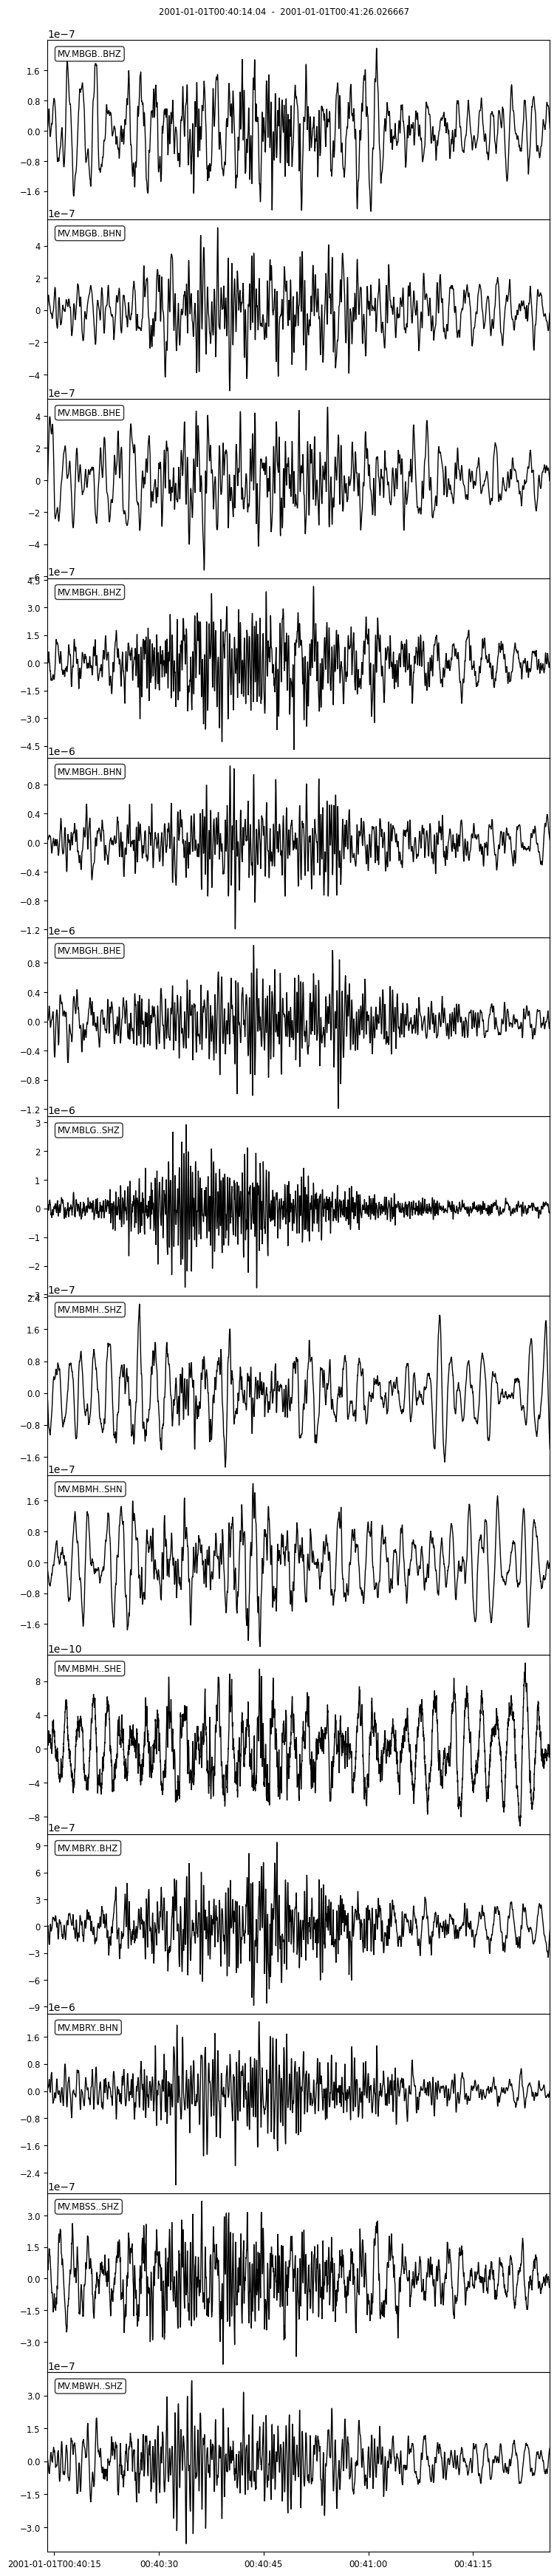

            time           min          mean           max        median  \
0   9.783096e+08  1.019681e-11  5.855965e-08  2.035309e-07  5.382636e-08   
1   9.783096e+08  3.126853e-10  7.479006e-08  4.255923e-07  6.081793e-08   
2   9.783096e+08  7.320219e-10  1.361993e-07  5.108620e-07  1.152822e-07   
3   9.783096e+08  6.574728e-11  1.629038e-07  6.320679e-07  1.415117e-07   
4   9.783096e+08  5.800720e-10  1.925097e-07  8.073458e-07  1.496831e-07   
5   9.783096e+08  1.681875e-09  2.186151e-07  7.874663e-07  1.882463e-07   
6   9.783096e+08  3.410908e-10  2.501823e-07  8.202781e-07  1.966244e-07   
7   9.783096e+08  1.780961e-10  1.790215e-07  5.715016e-07  1.587976e-07   
8   9.783097e+08  5.039033e-10  1.249225e-07  5.151512e-07  1.001827e-07   
9   9.783097e+08  1.451978e-09  1.160280e-07  3.409952e-07  1.030977e-07   
10  9.783097e+08  4.836091e-10  9.948068e-08  2.392935e-07  9.223809e-08   
11  9.783097e+08  2.025994e-10  7.745925e-08  2.995879e-07  6.505230e-08   
12  9.783097

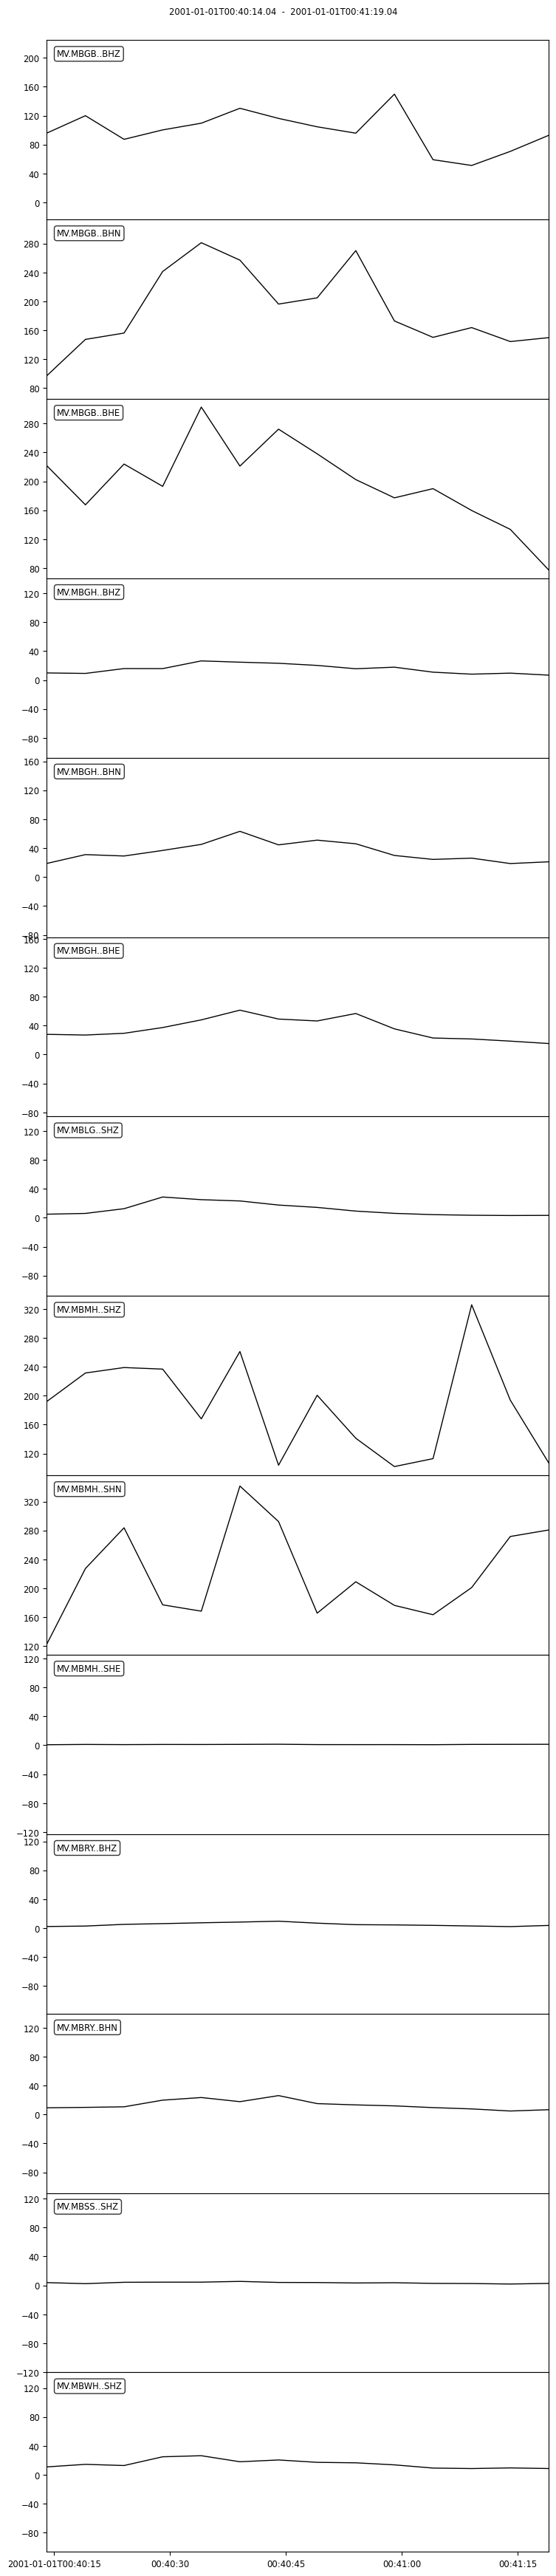

5.528803484543303e-08
1.2688449736427416e-07
4.078400595842804e-08
3.251441610213019e-08
8.972058414843935e-08
7.2898404379227e-08
3.391410240932012e-08
2.5003361625913605e-08
4.751932294488237e-08
3.775171089400746e-08
2.0085352869465272e-08
2.4196705706654763e-08
1.4081683193301317e-10
9.017765604247297e-08
1.1054372738325972e-08
1.9184125465270862e-08
7.491691655386715e-09
6.137359418372365e-09
1.1753392566353068e-08
1.098800053407549e-08
2.8772771429624166e-09
2.4844594953803135e-09
4.479868879727825e-09
3.482817200289929e-09
1.1716010091908043e-09
1.5306196001703458e-09
2.4419523751393498e-11
3.7211111539238585e-08
{'t': array([UTCDateTime(2001, 1, 1, 0, 40, 14, 40000),
       UTCDateTime(2001, 1, 1, 0, 40, 19, 40000),
       UTCDateTime(2001, 1, 1, 0, 40, 24, 40000),
       UTCDateTime(2001, 1, 1, 0, 40, 29, 40000),
       UTCDateTime(2001, 1, 1, 0, 40, 34, 40000),
       UTCDateTime(2001, 1, 1, 0, 40, 39, 40000),
       UTCDateTime(2001, 1, 1, 0, 40, 44, 40000),
       UTCDateTi

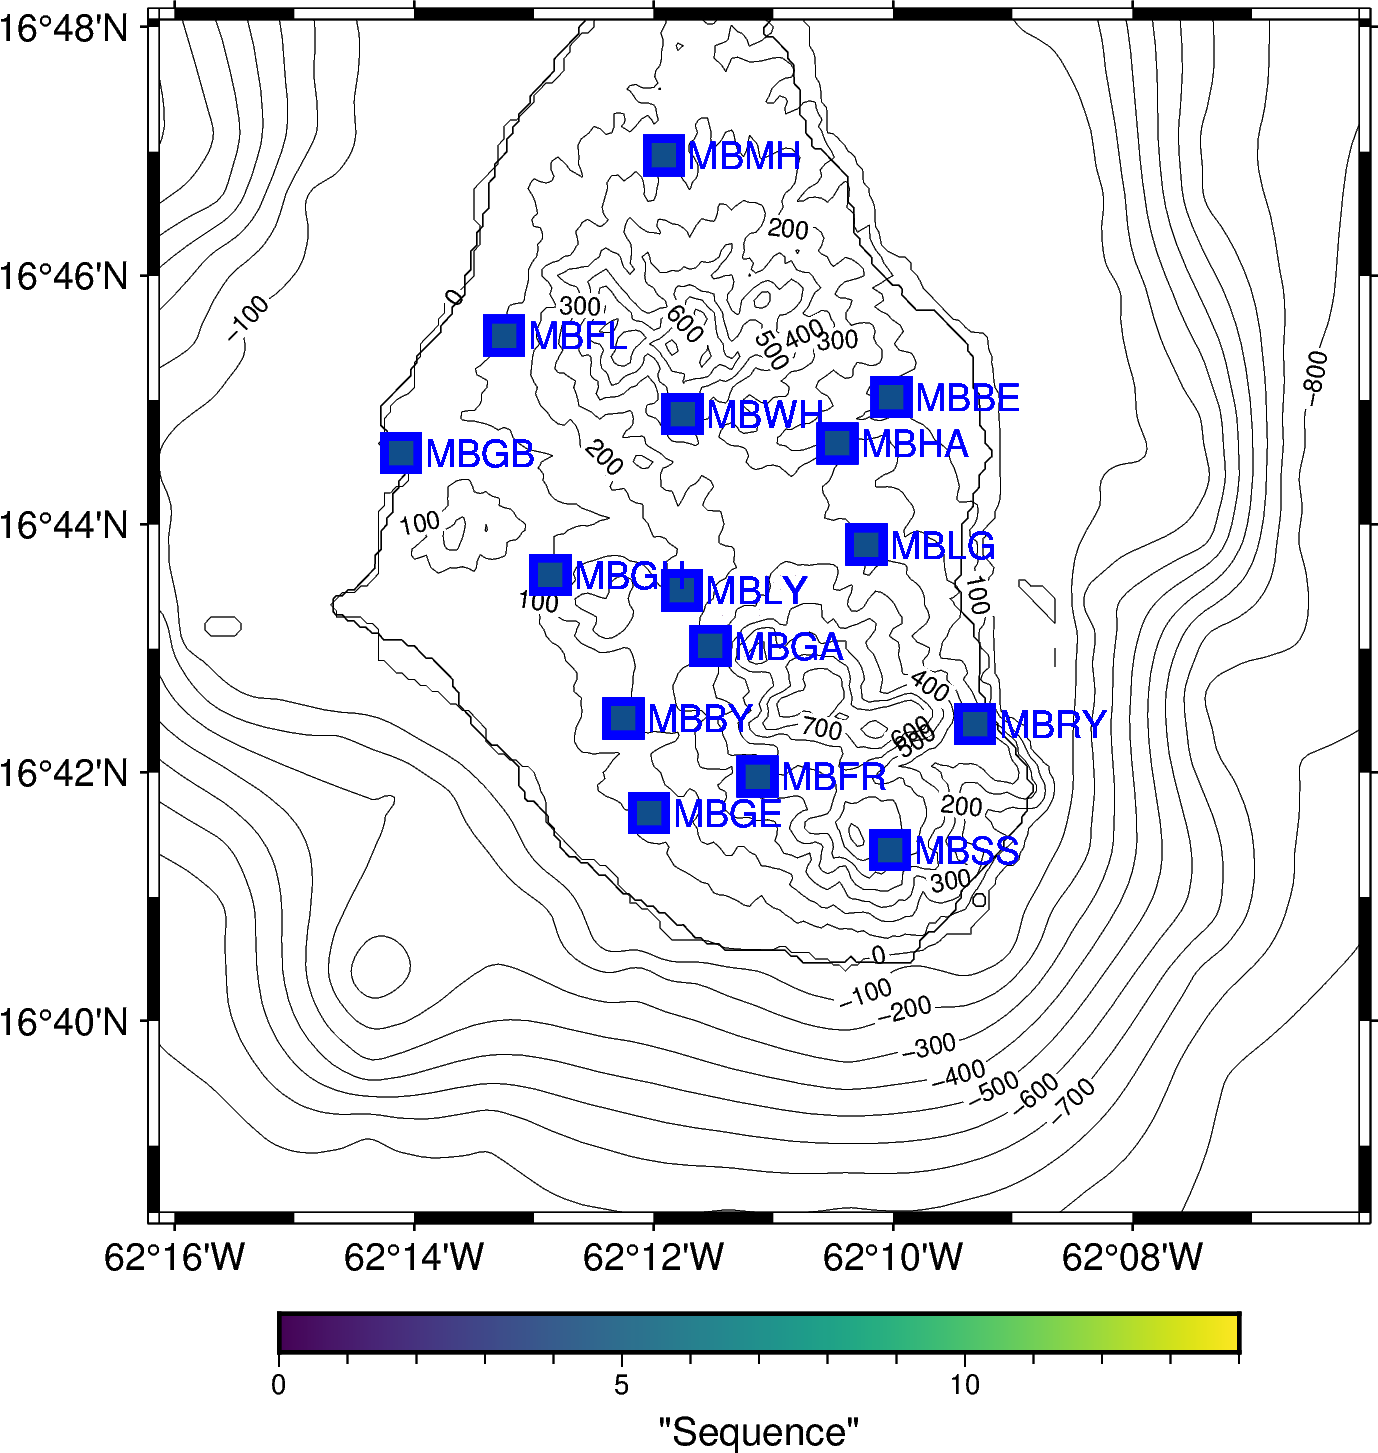

Parsing  /data/SEISAN_DB/REA/MVOE_/2001/01/01-0104-44L.S200101
Trying to read /data/SEISAN_DB/WAV/MVOE_/2001/01/2001-01-01-0104-44S.MVO___019
- checking sampling rate
- checking trace ID
- checking year not before 1995
16 Trace(s) in Stream:
MV.MBRY..BHZ | 2001-01-01T01:04:44.040000Z - 2001-01-01T01:07:11.026667Z | 75.0 Hz, 11025 samples
MV.MBRY..BHN | 2001-01-01T01:04:44.040000Z - 2001-01-01T01:07:11.026667Z | 75.0 Hz, 11025 samples
MV.MBRY..BHE | 2001-01-01T01:04:44.040000Z - 2001-01-01T01:07:11.026667Z | 75.0 Hz, 11025 samples
MV.MBSS..SHZ | 2001-01-01T01:04:44.040000Z - 2001-01-01T01:07:11.026667Z | 75.0 Hz, 11025 samples
MV.MBGH..BHZ | 2001-01-01T01:04:44.040000Z - 2001-01-01T01:07:11.026667Z | 75.0 Hz, 11025 samples
MV.MBGH..BHN | 2001-01-01T01:04:44.040000Z - 2001-01-01T01:07:11.026667Z | 75.0 Hz, 11025 samples
MV.MBGH..BHE | 2001-01-01T01:04:44.040000Z - 2001-01-01T01:07:11.026667Z | 75.0 Hz, 11025 samples
MV.MBWH..SHZ | 2001-01-01T01:04:44.040000Z - 2001-01-01T01:07:11.026667Z

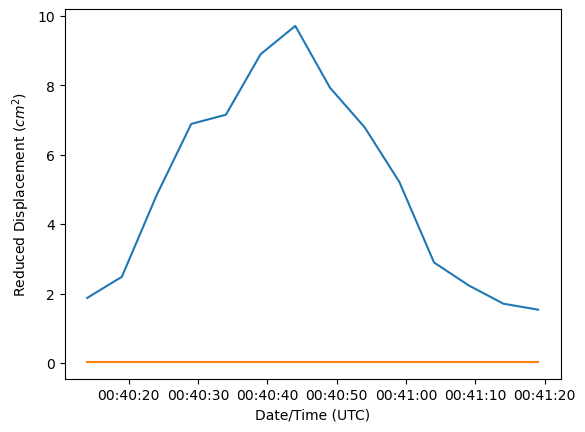

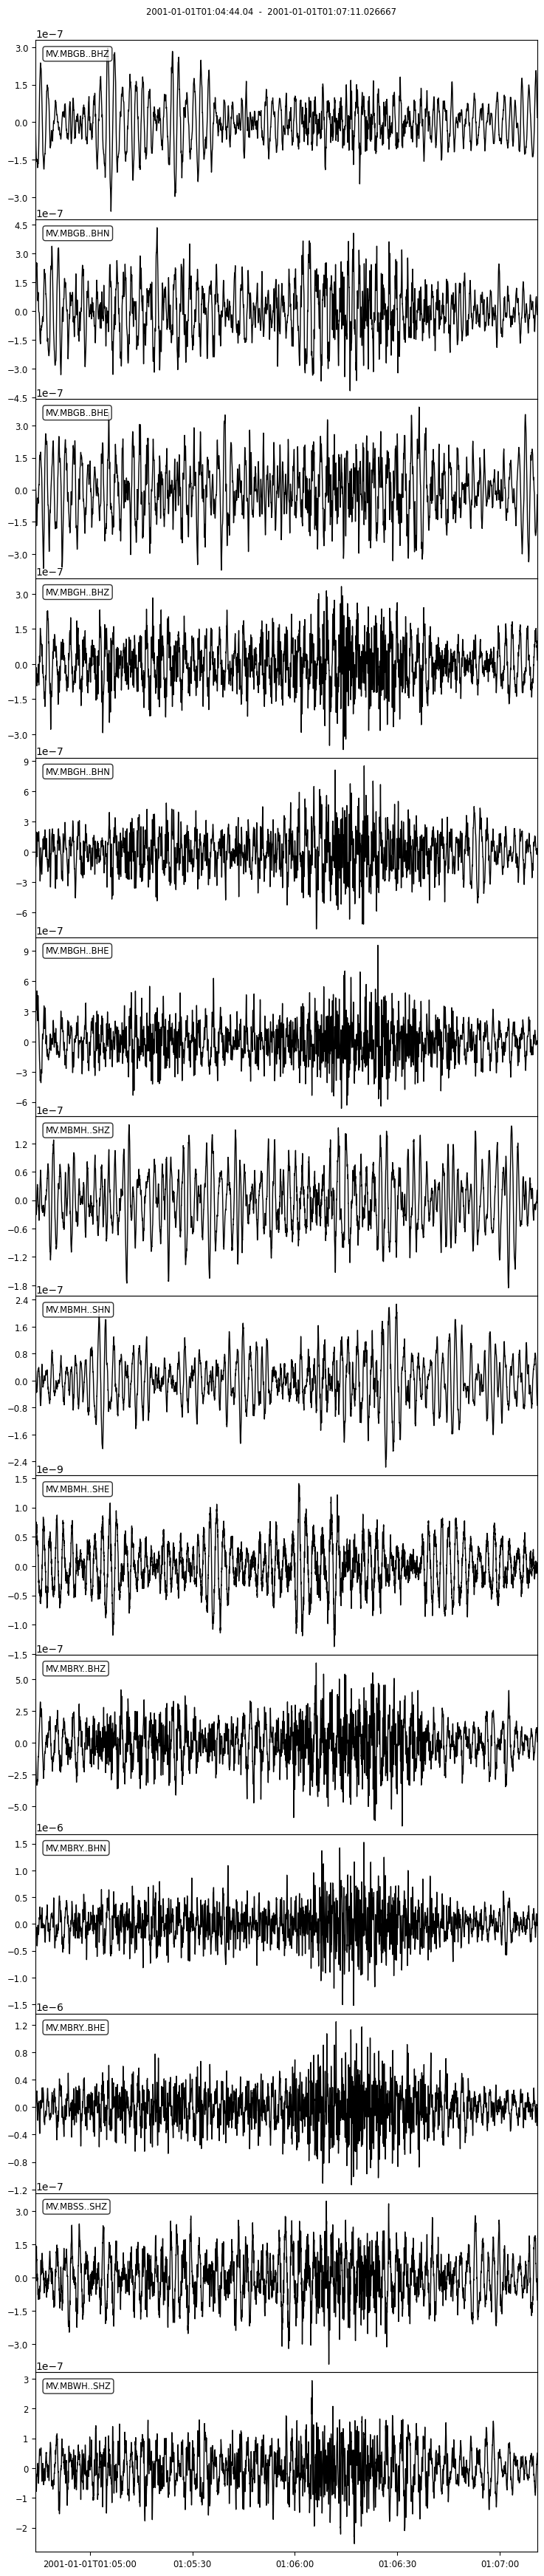

            time           min          mean           max        median  \
0   9.783111e+08  3.940877e-11  8.617971e-08  2.376517e-07  7.713171e-08   
1   9.783111e+08  3.155119e-10  6.636469e-08  2.023635e-07  6.323136e-08   
2   9.783111e+08  3.132191e-11  8.029076e-08  2.818012e-07  7.039377e-08   
3   9.783111e+08  2.070035e-10  7.301938e-08  3.154715e-07  6.054658e-08   
4   9.783111e+08  7.363200e-10  9.431670e-08  3.146781e-07  7.414582e-08   
5   9.783111e+08  5.322097e-10  9.901096e-08  3.343458e-07  7.691681e-08   
6   9.783111e+08  4.422156e-10  1.061224e-07  3.296877e-07  9.636164e-08   
7   9.783111e+08  6.777552e-10  8.979029e-08  3.944060e-07  7.055167e-08   
8   9.783111e+08  8.451233e-11  1.243243e-07  4.076963e-07  1.130492e-07   
9   9.783111e+08  5.530677e-10  7.831587e-08  2.185657e-07  7.214480e-08   
10  9.783111e+08  2.807058e-10  8.096035e-08  2.738850e-07  7.534576e-08   
11  9.783111e+08  4.648031e-10  8.024162e-08  2.348315e-07  7.720010e-08   
12  9.783111

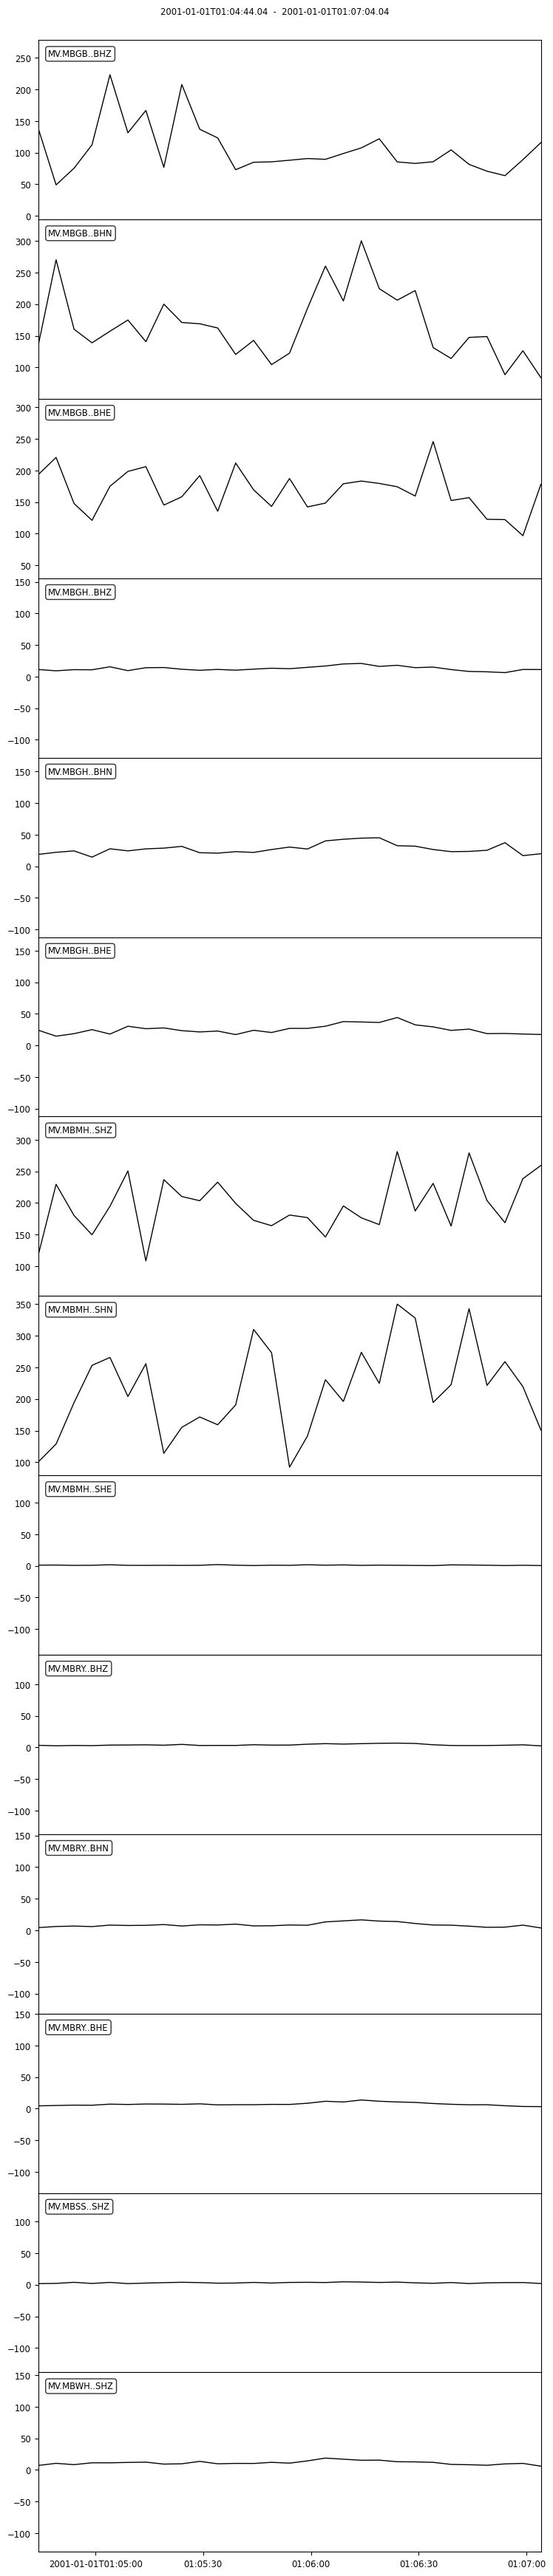

6.352949500443198e-08
9.970621986440755e-08
8.409121565858148e-08
3.864629734166935e-08
3.0352671811964544e-08
6.913775271902878e-08
7.049885234823865e-08
2.287544992154187e-08
2.3903857989765765e-08
4.0963925100497344e-08
4.7339601143027635e-08
2.1335925841306193e-08
1.8126634872522852e-08
1.0873485484147977e-10
9.193200026451583e-09
2.1297741119988613e-08
1.8111172994889865e-08
7.407864201818493e-09
6.956191745396066e-09
9.14874535737528e-09
1.3245125695470095e-08
3.0333434279487372e-09
2.230645419395867e-09
4.3632612580318895e-09
3.297611023869716e-09
1.6089108818899137e-09
1.7800421129282302e-09
2.550542394975963e-11
{'t': array([UTCDateTime(2001, 1, 1, 1, 4, 44, 40000),
       UTCDateTime(2001, 1, 1, 1, 4, 49, 40000),
       UTCDateTime(2001, 1, 1, 1, 4, 54, 40000),
       UTCDateTime(2001, 1, 1, 1, 4, 59, 40000),
       UTCDateTime(2001, 1, 1, 1, 5, 4, 40000),
       UTCDateTime(2001, 1, 1, 1, 5, 9, 40000),
       UTCDateTime(2001, 1, 1, 1, 5, 14, 40000),
       UTCDateTime(2001,

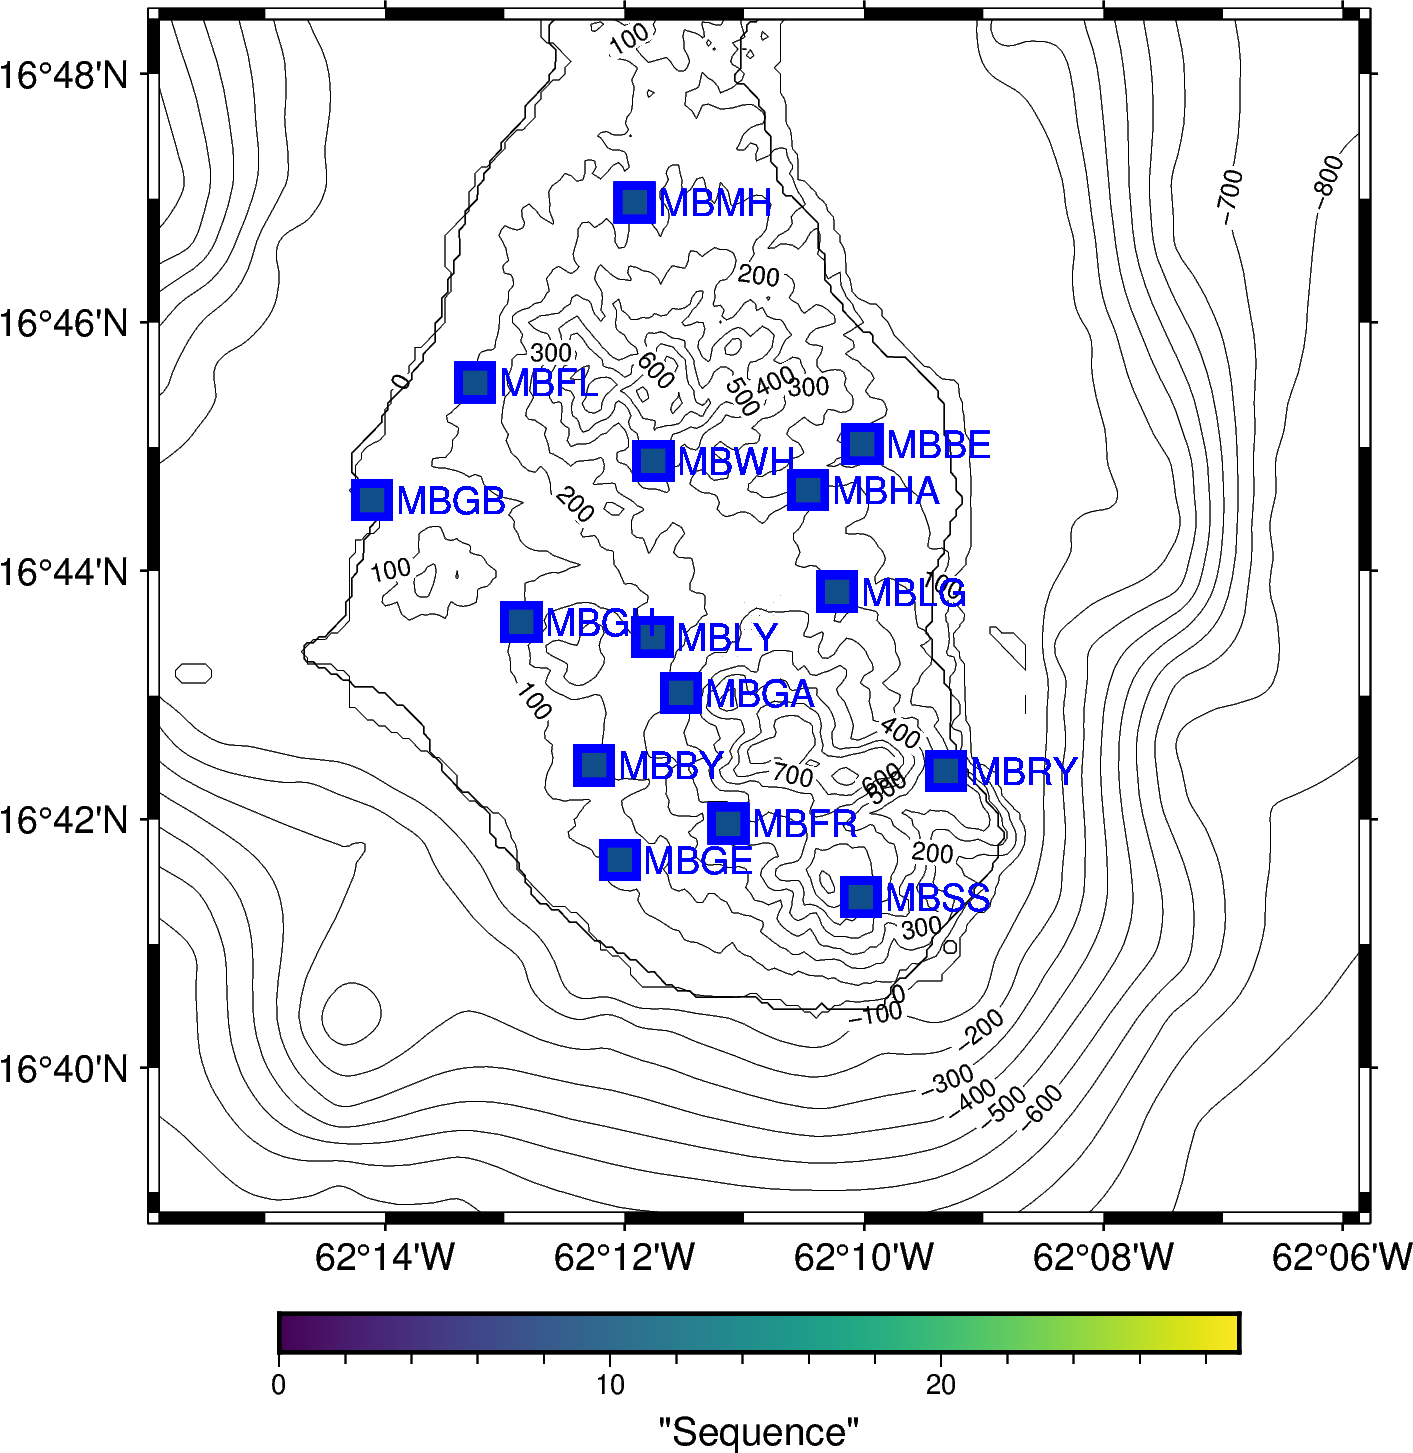

Parsing  /data/SEISAN_DB/REA/MVOE_/2001/01/01-0115-13L.S200101
Trying to read /data/SEISAN_DB/WAV/MVOE_/2001/01/2001-01-01-0115-13S.MVO___019
- checking sampling rate
- checking trace ID
- checking year not before 1995
16 Trace(s) in Stream:
MV.MBRY..BHZ | 2001-01-01T01:15:13.040000Z - 2001-01-01T01:16:53.026667Z | 75.0 Hz, 7500 samples
MV.MBRY..BHN | 2001-01-01T01:15:13.040000Z - 2001-01-01T01:16:53.026667Z | 75.0 Hz, 7500 samples
MV.MBRY..BHE | 2001-01-01T01:15:13.040000Z - 2001-01-01T01:16:53.026667Z | 75.0 Hz, 7500 samples
MV.MBSS..SHZ | 2001-01-01T01:15:13.040000Z - 2001-01-01T01:16:53.026667Z | 75.0 Hz, 7500 samples
MV.MBGH..BHZ | 2001-01-01T01:15:13.040000Z - 2001-01-01T01:16:53.026667Z | 75.0 Hz, 7500 samples
MV.MBGH..BHN | 2001-01-01T01:15:13.040000Z - 2001-01-01T01:16:53.026667Z | 75.0 Hz, 7500 samples
MV.MBGH..BHE | 2001-01-01T01:15:13.040000Z - 2001-01-01T01:16:53.026667Z | 75.0 Hz, 7500 samples
MV.MBWH..SHZ | 2001-01-01T01:15:13.040000Z - 2001-01-01T01:16:53.026667Z | 75.0

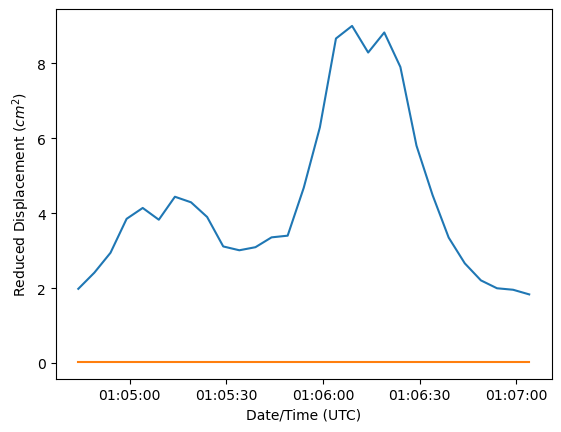

            time           min          mean           max        median  \
0   9.783117e+08  6.558015e-12  6.736949e-08  1.552251e-07  6.096629e-08   
1   9.783117e+08  7.660143e-10  9.027290e-08  2.114083e-07  8.435001e-08   
2   9.783117e+08  7.682289e-10  6.898158e-08  2.409806e-07  5.829076e-08   
3   9.783117e+08  9.499725e-10  1.406828e-07  5.852407e-07  1.164404e-07   
4   9.783117e+08  2.453282e-10  1.851604e-07  5.885953e-07  1.452699e-07   
5   9.783117e+08  8.963348e-10  1.341305e-07  4.038058e-07  1.158561e-07   
6   9.783117e+08  4.573421e-10  1.842910e-07  7.743594e-07  1.240407e-07   
7   9.783117e+08  8.610209e-10  1.216154e-07  3.438903e-07  1.000396e-07   
8   9.783118e+08  3.970047e-09  1.446162e-07  4.094191e-07  1.205488e-07   
9   9.783118e+08  1.148629e-10  1.347302e-07  4.069859e-07  1.075034e-07   
10  9.783118e+08  1.335248e-09  1.103905e-07  3.202272e-07  1.071484e-07   
11  9.783118e+08  5.712291e-10  7.626276e-08  2.461372e-07  6.977008e-08   
12  9.783118

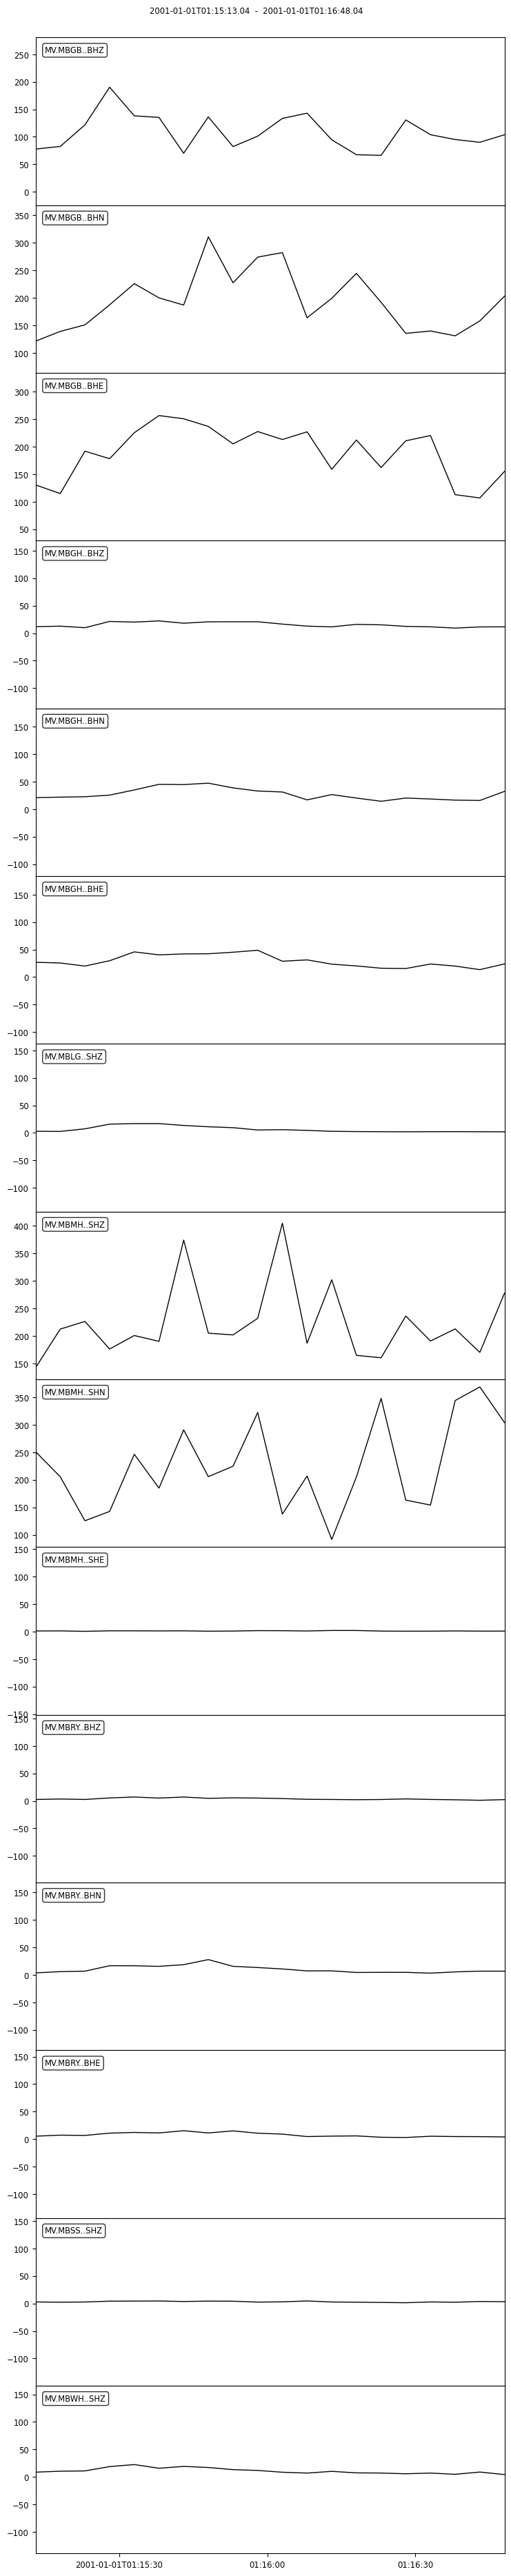

3.008357593886532e-08
8.297969669091288e-08
7.727829056467052e-08
2.8749707736821793e-08
4.424795787453532e-08
6.873589474666961e-08
6.502292986281068e-08
1.64496922844951e-08
3.240534433293503e-08
5.9304837093370935e-08
5.225059165925317e-08
2.799676152846963e-08
1.8035327231874373e-08
9.548840125336059e-11
5.9060403711280367e-08
5.615589978914154e-09
1.2953715123085168e-08
1.018894594701599e-08
5.582525546149366e-09
3.36786883271352e-09
5.8480702548885776e-09
7.407134017364136e-09
1.4659035979955288e-09
1.2680952166463031e-09
2.322638418459698e-09
2.0706577411917086e-09
9.413593053127219e-10
1.3519183144438677e-09
2.4723762646977975e-11
2.6598958576895458e-08
{'t': array([UTCDateTime(2001, 1, 1, 1, 15, 13, 40000),
       UTCDateTime(2001, 1, 1, 1, 15, 18, 40000),
       UTCDateTime(2001, 1, 1, 1, 15, 23, 40000),
       UTCDateTime(2001, 1, 1, 1, 15, 28, 40000),
       UTCDateTime(2001, 1, 1, 1, 15, 33, 40000),
       UTCDateTime(2001, 1, 1, 1, 15, 38, 40000),
       UTCDateTime(2001,

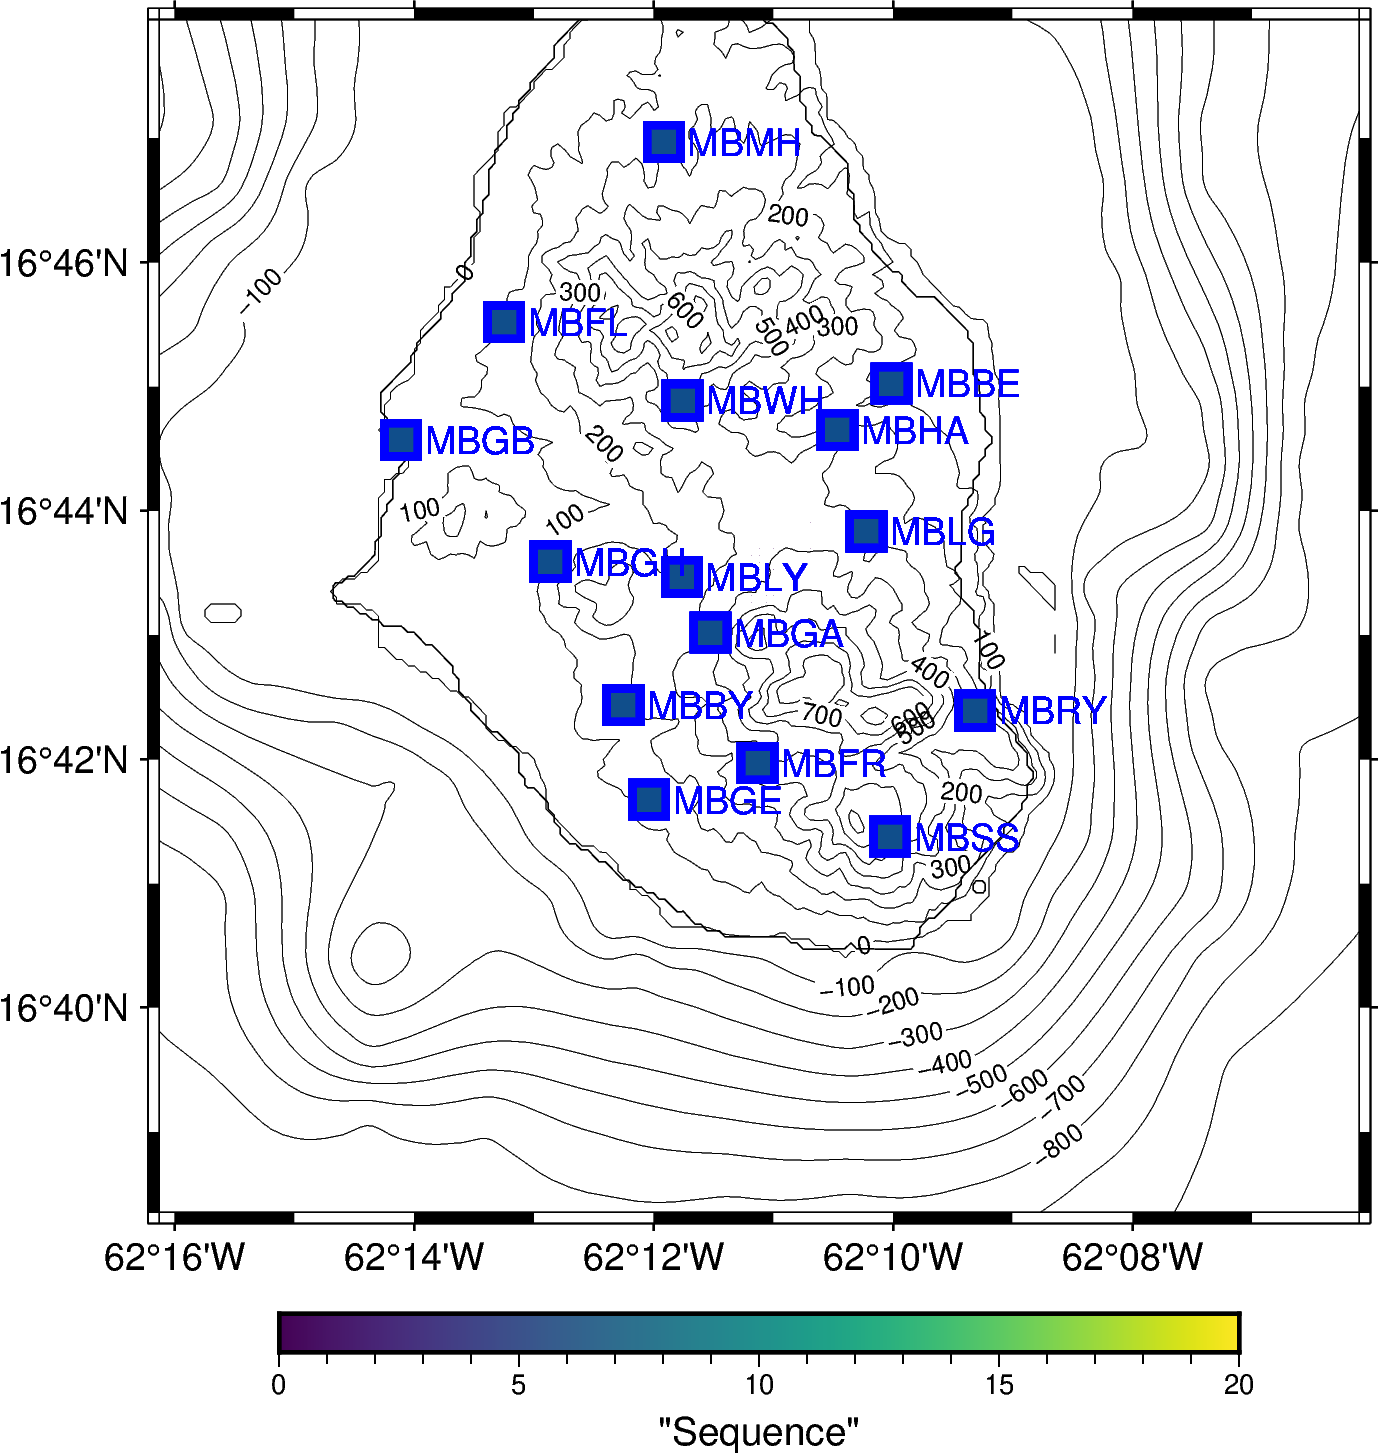

Parsing  /data/SEISAN_DB/REA/MVOE_/2001/01/01-0122-30L.S200101
Trying to read /data/SEISAN_DB/WAV/MVOE_/2001/01/2001-01-01-0122-30S.MVO___019
- checking sampling rate
- checking trace ID
- checking year not before 1995
16 Trace(s) in Stream:
MV.MBRY..BHZ | 2001-01-01T01:22:30.040000Z - 2001-01-01T01:25:29.026667Z | 75.0 Hz, 13425 samples
MV.MBRY..BHN | 2001-01-01T01:22:30.040000Z - 2001-01-01T01:25:29.026667Z | 75.0 Hz, 13425 samples
MV.MBRY..BHE | 2001-01-01T01:22:30.040000Z - 2001-01-01T01:25:29.026667Z | 75.0 Hz, 13425 samples
MV.MBSS..SHZ | 2001-01-01T01:22:30.040000Z - 2001-01-01T01:25:29.026667Z | 75.0 Hz, 13425 samples
MV.MBGH..BHZ | 2001-01-01T01:22:30.040000Z - 2001-01-01T01:25:29.026667Z | 75.0 Hz, 13425 samples
MV.MBGH..BHN | 2001-01-01T01:22:30.040000Z - 2001-01-01T01:25:29.026667Z | 75.0 Hz, 13425 samples
MV.MBGH..BHE | 2001-01-01T01:22:30.040000Z - 2001-01-01T01:25:29.026667Z | 75.0 Hz, 13425 samples
MV.MBWH..SHZ | 2001-01-01T01:22:30.040000Z - 2001-01-01T01:25:29.026667Z

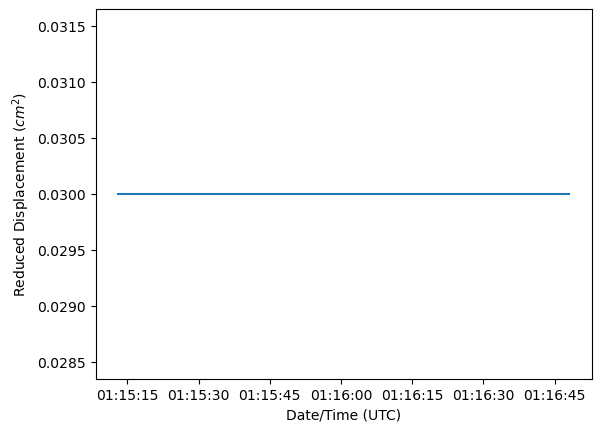

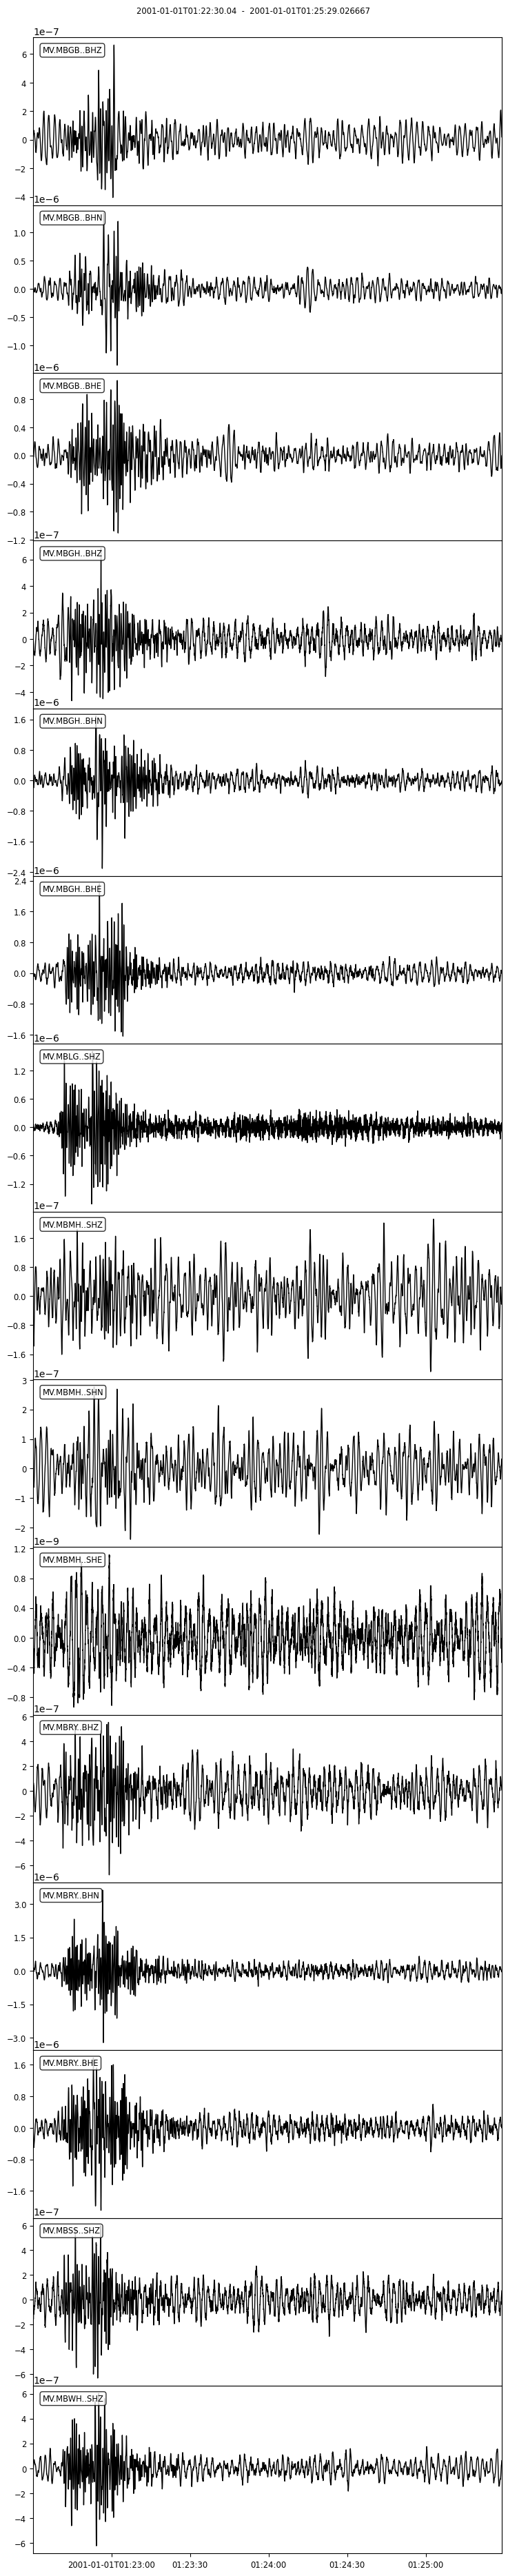

            time           min          mean           max        median  \
0   9.783122e+08  2.640449e-10  7.188047e-08  2.085269e-07  6.458517e-08   
1   9.783122e+08  3.407112e-10  6.410710e-08  1.696153e-07  5.209887e-08   
2   9.783122e+08  1.969527e-10  1.248395e-07  4.817497e-07  9.723172e-08   
3   9.783122e+08  2.903925e-11  1.603783e-07  4.318236e-07  1.468819e-07   
4   9.783122e+08  1.518303e-10  1.583386e-07  4.568756e-07  1.384650e-07   
5   9.783122e+08  2.036755e-09  2.169800e-07  7.410237e-07  1.840316e-07   
6   9.783122e+08  4.074061e-10  2.117014e-07  5.380420e-07  2.040919e-07   
7   9.783122e+08  1.961854e-10  1.000764e-07  3.249028e-07  8.598266e-08   
8   9.783122e+08  2.875686e-10  7.621677e-08  2.912619e-07  6.013637e-08   
9   9.783122e+08  2.433013e-10  6.663052e-08  1.940338e-07  5.467066e-08   
10  9.783122e+08  1.626552e-10  5.990464e-08  1.871624e-07  4.781493e-08   
11  9.783122e+08  1.507030e-10  5.868992e-08  1.818857e-07  4.692152e-08   
12  9.783122

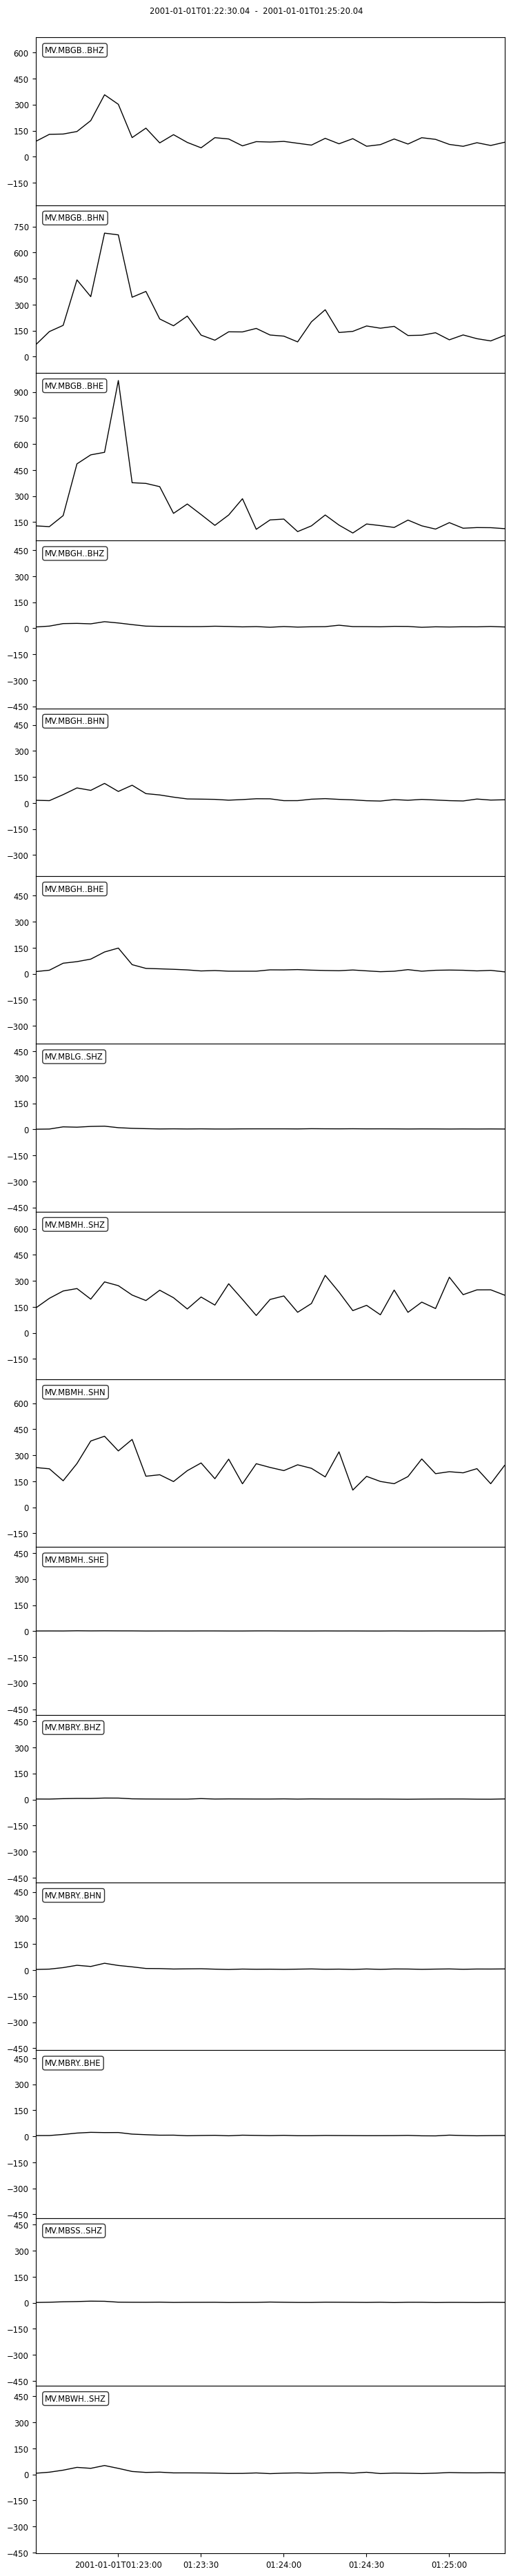

4.0634477456695987e-08
9.33446811156951e-08
7.048606431694894e-08
3.4085975588781125e-08
2.676914609510057e-08
5.320634461311829e-08
5.3277417374353515e-08
1.8045668781653126e-08
2.4980873004637396e-08
3.3219866904887375e-08
4.2645760475643285e-08
1.9815029463291217e-08
1.946726540215971e-08
1.1471319669349541e-10
2.8087107878793906e-08
3.8810718216873256e-09
7.591167547655902e-09
7.953980727636639e-09
6.1650061461335994e-09
3.8695861424244604e-09
5.433932230814864e-09
5.637557915830716e-09
1.0380290286410163e-09
9.586112278133536e-10
1.7626758175702801e-09
1.5472158751960822e-09
1.0655686534433786e-09
1.3057351805382408e-09
2.2136151795952116e-11
1.2656389387823166e-08
{'t': array([UTCDateTime(2001, 1, 1, 1, 22, 30, 40000),
       UTCDateTime(2001, 1, 1, 1, 22, 35, 40000),
       UTCDateTime(2001, 1, 1, 1, 22, 40, 40000),
       UTCDateTime(2001, 1, 1, 1, 22, 45, 40000),
       UTCDateTime(2001, 1, 1, 1, 22, 50, 40000),
       UTCDateTime(2001, 1, 1, 1, 22, 55, 40000),
       UTCDateT

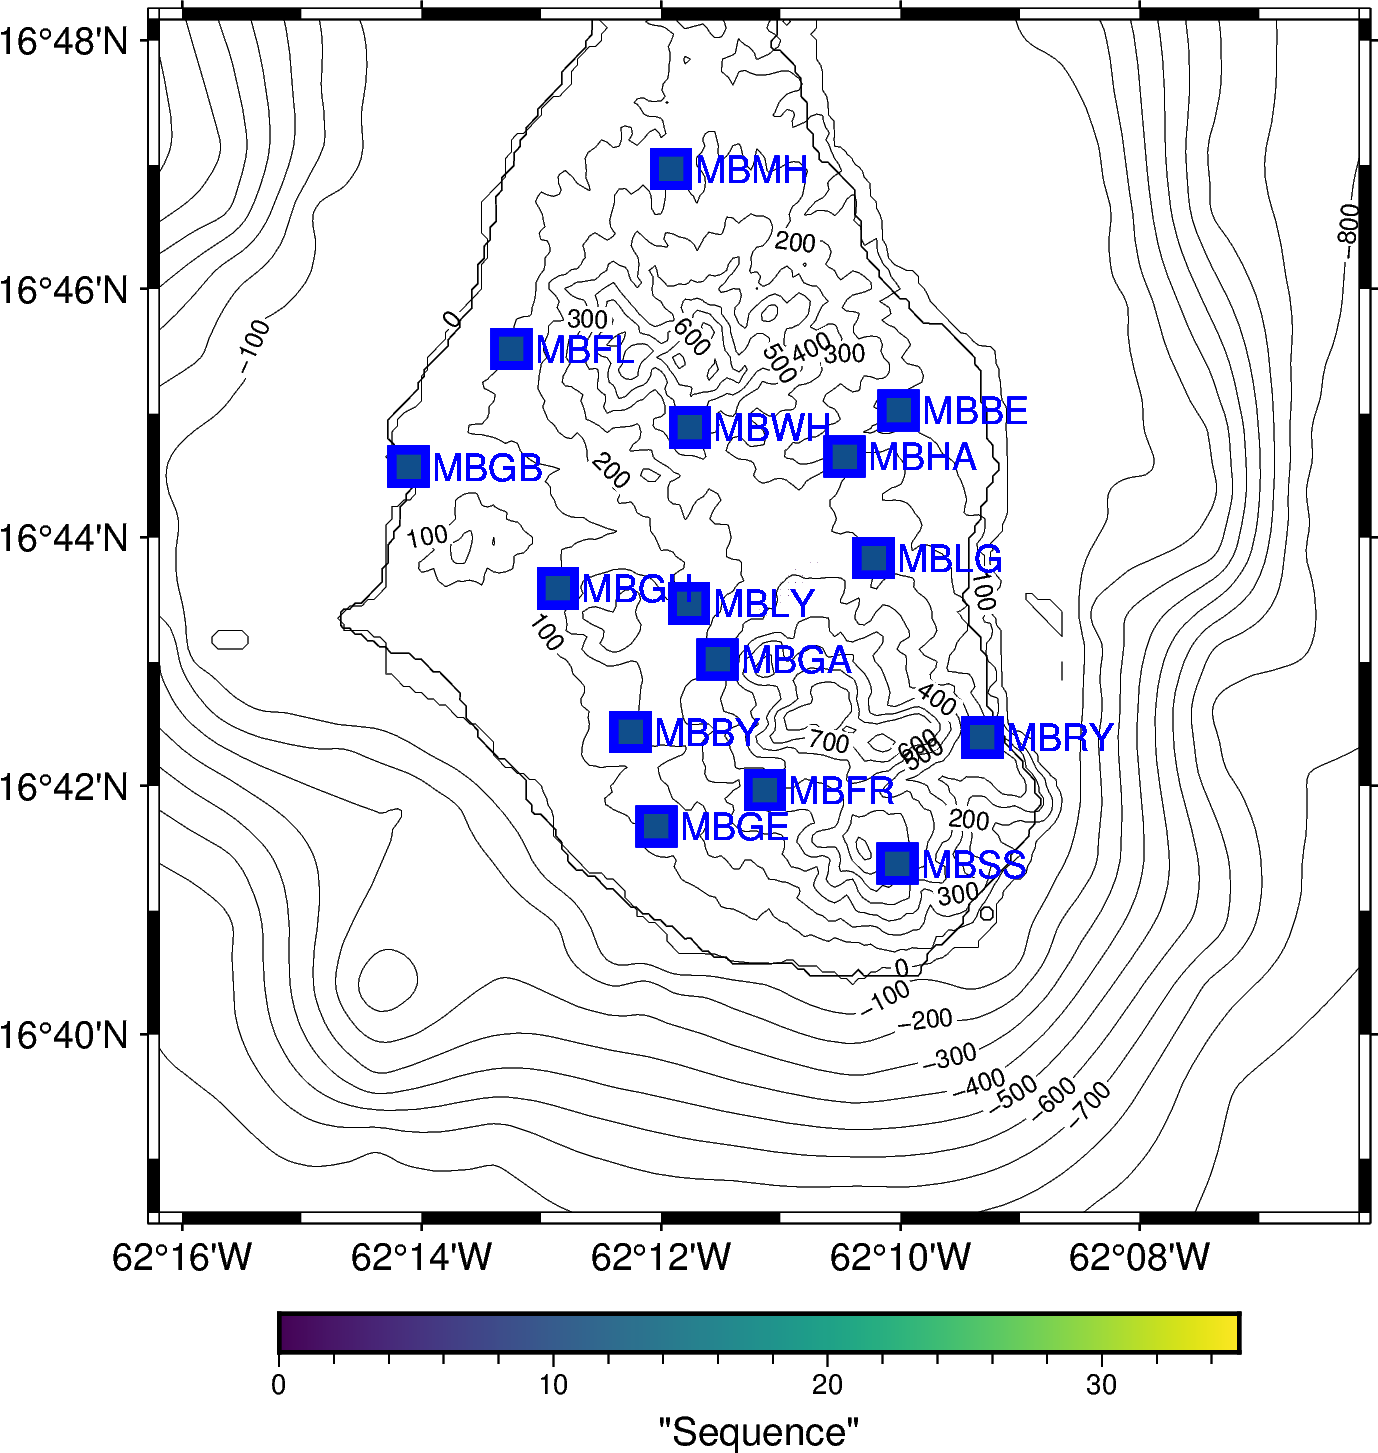

Parsing  /data/SEISAN_DB/REA/MVOE_/2001/01/01-0140-10L.S200101
Trying to read /data/SEISAN_DB/WAV/MVOE_/2001/01/2001-01-01-0140-10S.MVO___019
- checking sampling rate
- checking trace ID
- checking year not before 1995
16 Trace(s) in Stream:
MV.MBRY..BHZ | 2001-01-01T01:40:10.040000Z - 2001-01-01T01:41:04.026667Z | 75.0 Hz, 4050 samples
MV.MBRY..BHN | 2001-01-01T01:40:10.040000Z - 2001-01-01T01:41:04.026667Z | 75.0 Hz, 4050 samples
MV.MBRY..BHE | 2001-01-01T01:40:10.040000Z - 2001-01-01T01:41:04.026667Z | 75.0 Hz, 4050 samples
MV.MBSS..SHZ | 2001-01-01T01:40:10.040000Z - 2001-01-01T01:41:04.026667Z | 75.0 Hz, 4050 samples
MV.MBGH..BHZ | 2001-01-01T01:40:10.040000Z - 2001-01-01T01:41:04.026667Z | 75.0 Hz, 4050 samples
MV.MBGH..BHN | 2001-01-01T01:40:10.040000Z - 2001-01-01T01:41:04.026667Z | 75.0 Hz, 4050 samples
MV.MBGH..BHE | 2001-01-01T01:40:10.040000Z - 2001-01-01T01:41:04.026667Z | 75.0 Hz, 4050 samples
MV.MBWH..SHZ | 2001-01-01T01:40:10.040000Z - 2001-01-01T01:41:04.026667Z | 75.0

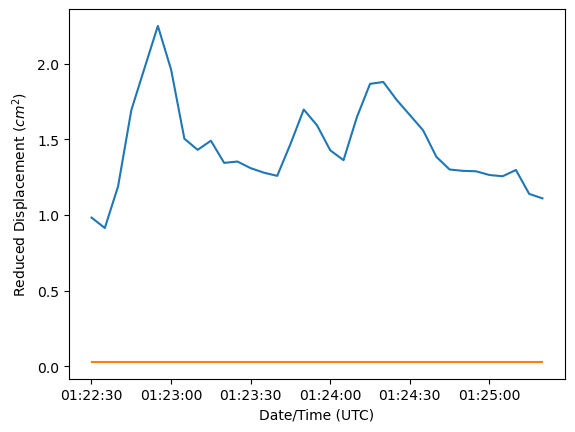

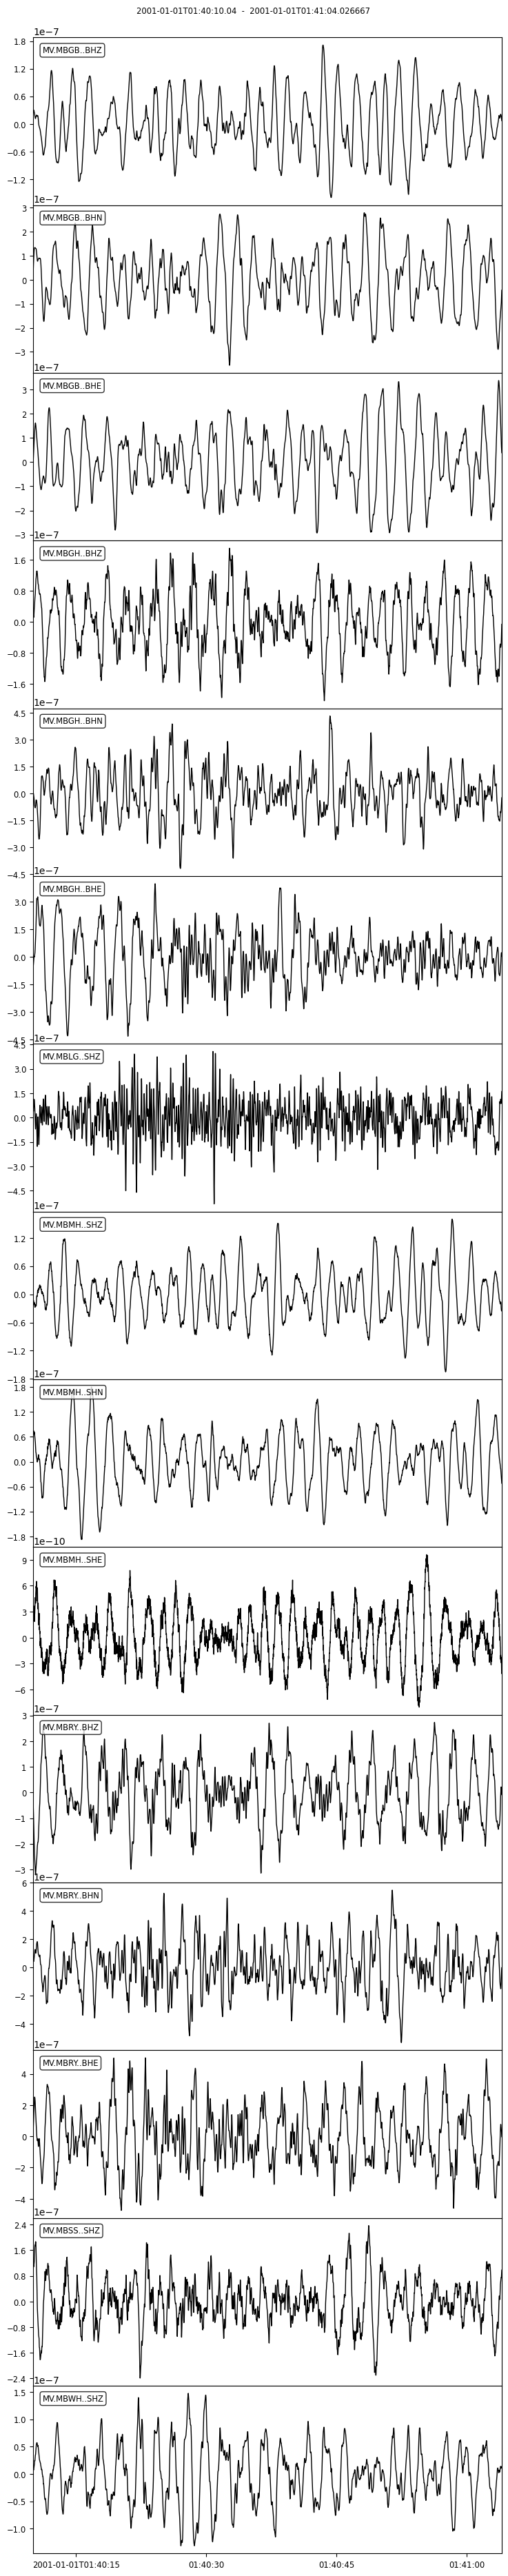

           time           min          mean           max        median  \
0  9.783132e+08  3.532775e-11  8.445995e-08  2.007332e-07  8.396284e-08   
1  9.783132e+08  2.985105e-10  6.277530e-08  1.811517e-07  5.720633e-08   
2  9.783132e+08  6.612736e-10  6.956483e-08  2.126343e-07  6.143675e-08   
3  9.783132e+08  5.710045e-10  7.176692e-08  1.977429e-07  6.490661e-08   
4  9.783132e+08  1.438490e-10  4.329371e-08  1.453096e-07  3.479897e-08   
5  9.783132e+08  3.801496e-12  7.141333e-08  2.000142e-07  6.339751e-08   
6  9.783132e+08  4.075186e-10  5.550369e-08  1.800742e-07  5.118038e-08   
7  9.783132e+08  2.683883e-11  6.054444e-08  1.554245e-07  5.835470e-08   
8  9.783133e+08  2.363695e-10  5.224062e-08  1.712591e-07  4.463214e-08   
9  9.783133e+08  9.229097e-11  6.739996e-08  2.479604e-07  5.883994e-08   

            rms           VLP            LP            VT    fratio  
0  4.556232e-08  1.397236e-08  8.415267e-08  8.159710e-09 -3.366419  
1  4.059503e-08  1.055731e-08  6.3

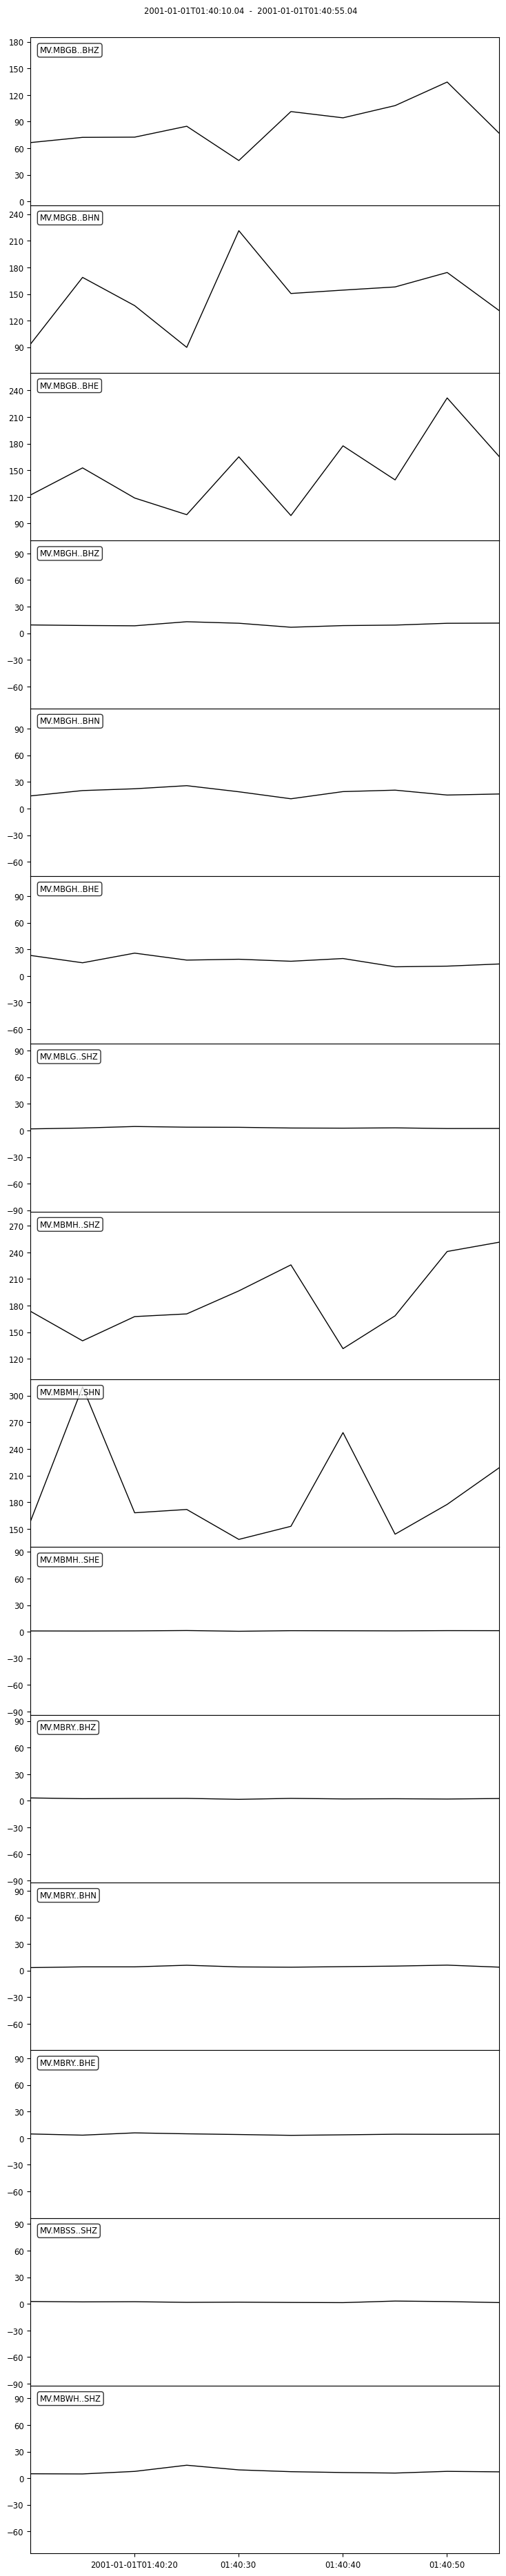

4.32937059708861e-08
8.765942357827072e-08
8.386017641668981e-08
3.058471815638888e-08
3.234221761241679e-08
5.263435809401224e-08
4.950431856602647e-08
1.8923561140611384e-08
2.2567447735387768e-08
4.393749248545677e-08
4.8360069980141624e-08
2.5887050344352263e-08
2.7180736148985934e-08
1.0346354968946897e-10
5.076773751908643e-08
8.159709894190793e-09
1.3533111113339489e-08
1.322357568831166e-08
6.925656453598746e-09
3.909911543449705e-09
6.164118675763511e-09
6.878833536683751e-09
1.5207208718522529e-09
1.5372887380158865e-09
3.0744987596267752e-09
1.7513235805317247e-09
1.2037025302038996e-09
1.7731623641626231e-09
2.457367665332456e-11
2.6675281909877792e-08
{'t': array([UTCDateTime(2001, 1, 1, 1, 40, 10, 40000),
       UTCDateTime(2001, 1, 1, 1, 40, 15, 40000),
       UTCDateTime(2001, 1, 1, 1, 40, 20, 40000),
       UTCDateTime(2001, 1, 1, 1, 40, 25, 40000),
       UTCDateTime(2001, 1, 1, 1, 40, 30, 40000),
       UTCDateTime(2001, 1, 1, 1, 40, 35, 40000),
       UTCDateTime(20

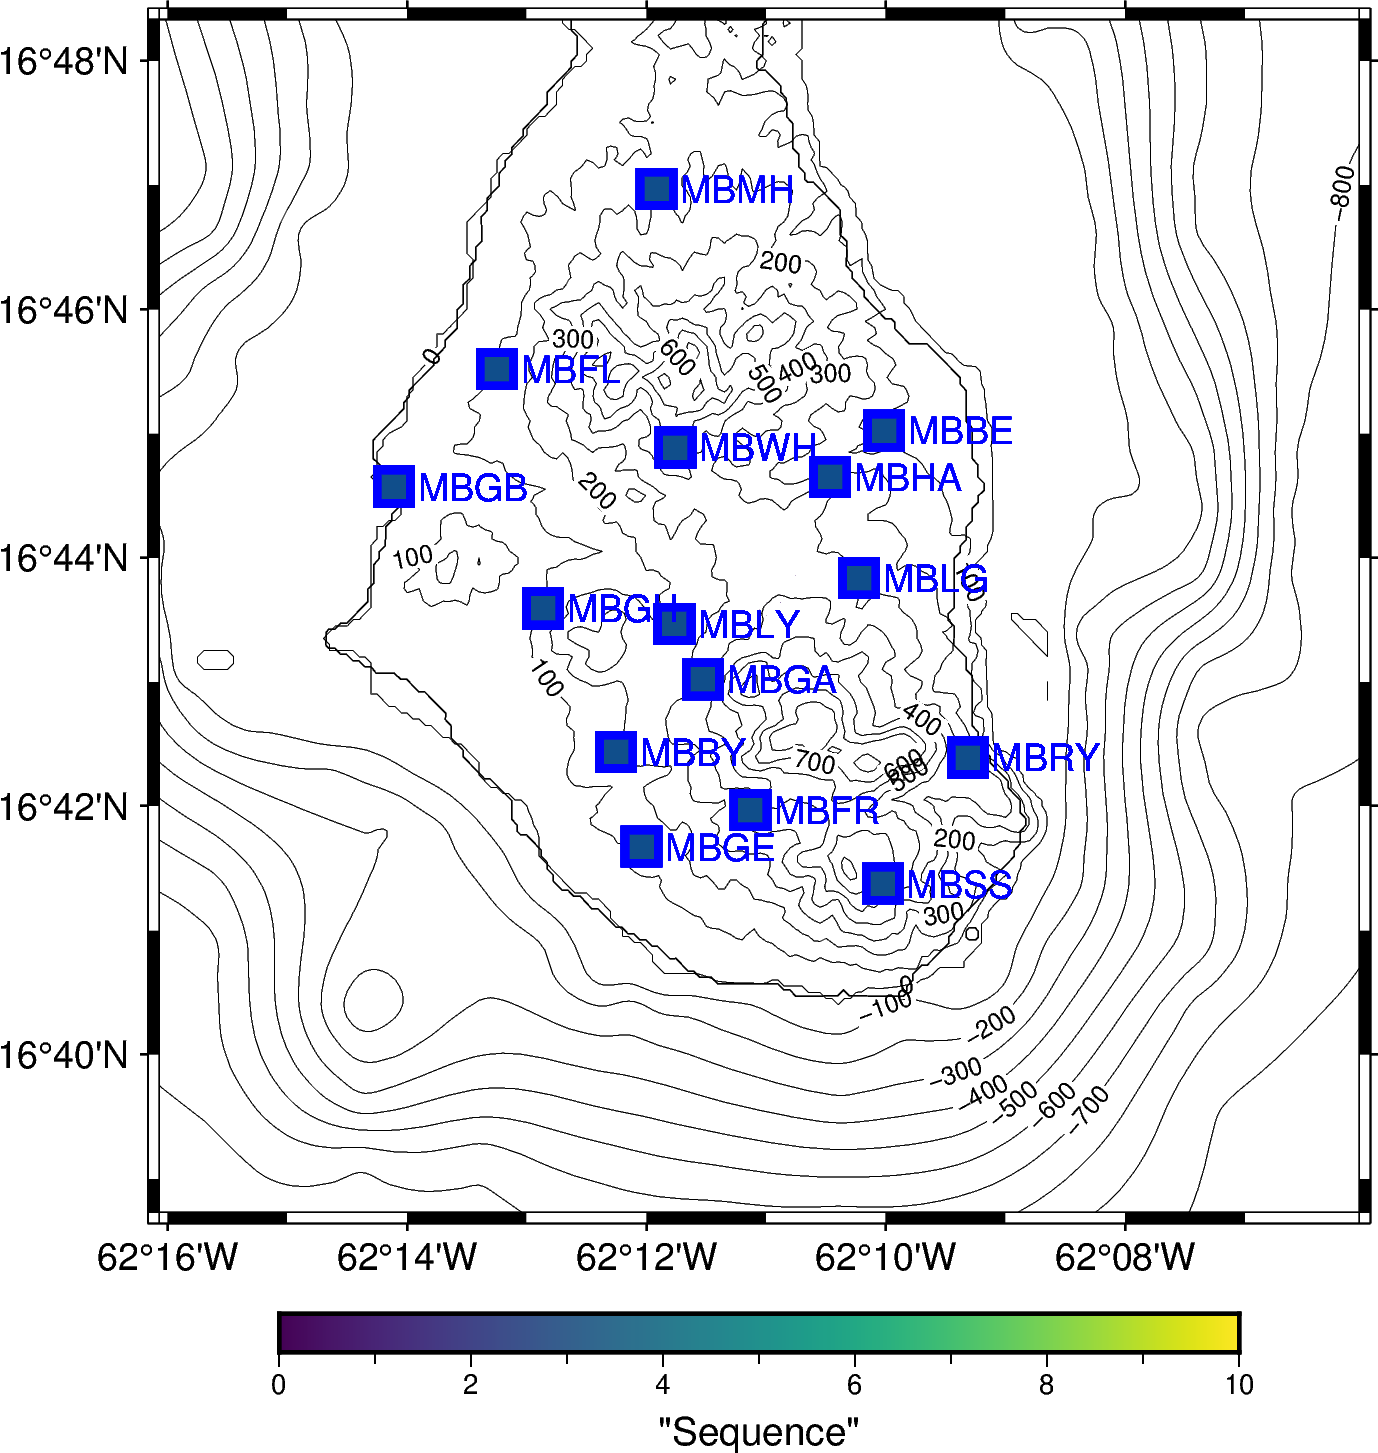

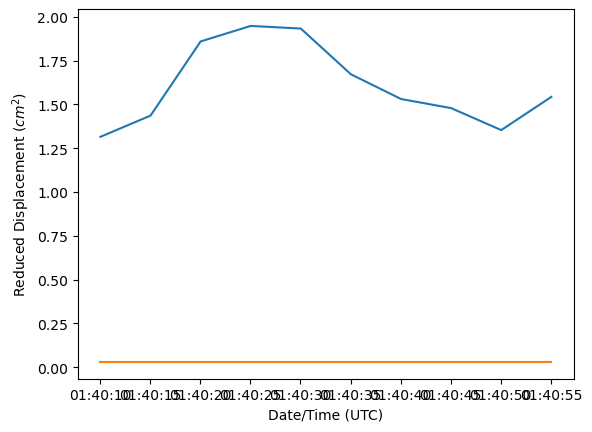

In [2]:

def asl_event(st, Q=23, surfaceWaveSpeed_kms = 1.5, peakf = 8.0, metric='rms', window_seconds=5): # Q=None or Q=23

    # same grid as before
    source = initial_source()
    gridobj = make_grid()
     
    # compute DSAM data with 10-s time window
    print(f'Stream for asl_event: {st}')
    st.plot(equal_scale=False);
    dsamObj = DSAM(stream=st, sampling_interval=window_seconds)
    print(f'DSAM object for asl_event: {dsamObj}')
    #dsamObj.plot(metrics=metric, equal_scale=True)

    # compute reduced displacement from DSAM data
    DRSobj = dsamObj.compute_reduced_displacement(inv, source, surfaceWaves=True, Q=Q, wavespeed_kms=surfaceWaveSpeed_kms, peakf=peakf)

    # plot DRS data - we assume the frequency band of interest for PDCs is same as the VT band we use for band ratio calculations. I think this is 4-18 Hz. But we could give different banks to the DSAM calculation above
    DRSmaxrms = DRSobj.max(metric='VT')
    print(f'Maximum DRS assuming fixed source is: {DRSmaxrms}')
    DRSobj.plot(equal_scale=True)   

    # Create an ASL object with DSAM (displacement amplitude) data, inventory data, and a grid object. The inventory is used for station locations to compute distances
    aslobj = ASL(dsamObj, 'VT', inv, gridobj)

    # Compute grid distances
    aslobj.compute_grid_distances()

    # Compute amplitude corrections
    aslobj.compute_amplitude_corrections(surfaceWaves=True, wavespeed_kms=surfaceWaveSpeed_kms, Q=Q, fix_peakf = peakf)

    # Estimate source location for each time window of window_seconds
    source_pf = aslobj.fast_locate()
    print(source_pf)

    # Plot the source location estimates
    # originally zoom_level=1, scale=0.2, number=10, equal_size=True
    aslobj.plot(source_pf, zoom_level=0, threshold_DR=0.03, \
                scale=1.0, join=True, number=0, \
                equal_size=False, add_labels=True) 
                

read_seisandb_apply_custom_function_to_each_event(startdate, enddate, \
                                                SEISAN_DATA='/data/SEISAN_DB', \
                                                DB='MVOE_', \
                                                inv=inv, \
                                                post_process_function=asl_event, \
                                                #post_process_function=None, \
                                                verbose=True, \
                                                bool_clean=True, \
                                                plot=True, \
                                                valid_subclasses='re', \
                                                quality_threshold=1.0,
                                                outputType='DISP', 
                                                freq=[0.5, 30.0])
                   